In [1]:
import numpy
import cv2 
import pandas as pd
import matplotlib.pyplot as plt

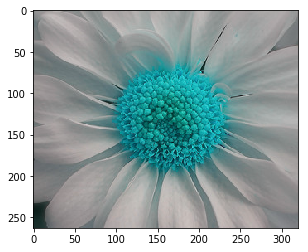

In [2]:
img = cv2.imread('data/flowers/daisy/100080576_f52e8ee070_n.jpg')
plt.imshow(img)
plt.show()

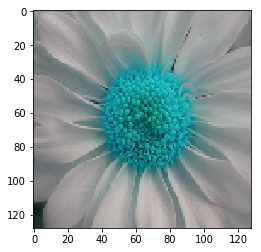

In [3]:
img_x = 128
img_y = 128
plt.imshow(cv2.resize(img, (img_x,img_y)))
plt.show()

In [4]:
#Load images into dataset
import glob
datalist = []
labellist = []
for image_path in glob.glob("data/flowers/tulip/*.jpg"):
    img = cv2.imread(image_path)
    img = img.astype("int16")
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(0)
    datalist.append(X)
for image_path in glob.glob("data/flowers/sunflower/*.jpg"):
    img = cv2.imread(image_path)
    img = img.astype("int16")
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(1)
    datalist.append(X)
for image_path in glob.glob("data/flowers/rose/*.jpg"):
    img = cv2.imread(image_path)
    img = img.astype("int16")
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(2)
    datalist.append(X)
for image_path in glob.glob("data/flowers/dandelion/*.jpg"):
    img = cv2.imread(image_path)
    img = img.astype("int16")
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(3)
    datalist.append(X)
for image_path in glob.glob("data/flowers/daisy/*.jpg"):
    img = cv2.imread(image_path)
    img = img.astype("int16")
    X = cv2.resize(img, (img_x,img_y))
    labellist.append(4)
    datalist.append(X)

In [5]:
datalist = numpy.array(datalist)
labellist = numpy.array(labellist)
datalist.shape

(2133, 128, 128, 3)

In [6]:
#Normalize pixel values for training
datalist = (datalist -127)/128

In [7]:
#One-hot encoding
n_labels = numpy.max(labellist) + 1
labellist = numpy.eye(n_labels)[labellist]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datalist, labellist, test_size = 0.35, shuffle=True)

In [36]:
import keras

In [37]:
cnn = keras.Sequential()
cnn.add(keras.layers.Conv2D(32, kernel_size=(1, 1), strides=(1,1), activation='relu', input_shape=(img_y,img_x,3)))
cnn.add(keras.layers.Dropout(rate=0.05))
cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#cnn.add(keras.layers.Conv2D(64, kernel_size=(2,2)))
cnn.add(keras.layers.Dropout(rate=0.05))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(100, activation="relu"))
cnn.add(keras.layers.Dropout(rate=0.25))
cnn.add(keras.layers.Dense(5, activation='softmax'))
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(lr=0.025),
              metrics=['accuracy'])

In [38]:
cnn.fit(X_train, y_train, epochs = 5, batch_size=4, validation_data=(X_test, y_test))

Train on 1386 samples, validate on 747 samples
Epoch 1/5
1386/1386 [==============================] - 63s 45ms/step - loss: 1.3437 - acc: 0.5087 - val_loss: 1.1048 - val_acc: 0.5087
Epoch 2/5
1386/1386 [==============================] - 61s 44ms/step - loss: 1.0417 - acc: 0.5974 - val_loss: 1.2063 - val_acc: 0.5355
Epoch 3/5
1386/1386 [==============================] - 62s 45ms/step - loss: 0.9336 - acc: 0.6472 - val_loss: 1.0465 - val_acc: 0.6078
Epoch 4/5
1386/1386 [==============================] - 61s 44ms/step - loss: 0.9128 - acc: 0.6667 - val_loss: 1.1218 - val_acc: 0.5676
Epoch 5/5
1386/1386 [==============================] - 62s 45ms/step - loss: 0.7585 - acc: 0.7107 - val_loss: 1.0049 - val_acc: 0.6372
